# Methodology 
Used: pandas, numpy, matplotlib libraries (Python 3)

Comments are also included in the code. I have put them all together here for clarity. 

## Step 1: Identifying the compromised merchant 

General strategy: 

(a) find compromised accounts

(b) find which merchants these accounts made transactions with in the 30-day period

(c) identify the compromised merchant as that having completed the greatest number of transactions with these accounts

In detail: 
1.	Import the csv data into a pandas DataFrame df
2.	Label the rows of df by the account numbers (so that the ‘account’ column is now the index column)
3.	Obtain list of accounts lst where fraud has been committed at some point  
4.	Use lst to drop the rows of df corresponding to accounts with no fraud committed. Further discard the rows where the condition fraud==true holds.  Save new DataFrame to df2. 
5.	From df2, obtain list of merchants m_lst with which compromised accounts have made fair (i.e. where fraud==false) transactions over the 30-day period 
6.	Use m_lst to create a dictionary to count the number of transactions with each merchant: m_dict = {merchant ID: number of transactions with compromised accounts}
7.	Identify the merchant with the greatest number of transactions 

## Step 2: Identifying harvest dates

Now must find on which dates the compromised accounts transacted with the compromised merchant. 

1. From df2, create DataFrame df3 consisting of all unfrauded transactions of compromised accounts with merchant M8

2. Using df3, create dictionary dict_dates={date: number of transactions of compromised accounts with M8}. 

3. Deduce dates from dict_dates/graphical method

## Step 3: Identifying exploitation dates 

1. Create DataFrame DF consisting of (a) only those accounts that made a transaction with M8, our suspected compromised merchant, and (b) only frauded transactions 

2. Create a dictionary of the form {date: number of transactions made by accounts in DF}

3. Identify days on which the largest number of transactions have been made: these are our suspected exploitation dates 


# Results 

#### Compromised merchant: M8
#### Harvest dates: ? 
The analysis is complicated by the fact that the accounts are making transactions with M8 every day, and M8 was only compromised for a short period of time. Since there is no visible peak in activity, simply looking at _when_ the compromised accounts transacted with M8 is insufficient to determine the harvest dates.

(Ran out of time to look into this more deeply)
#### Exploitation dates: 21/01/2015, 22/01/2015, 23/01/2015

In [158]:
import numpy as np
import pandas as pd

pd.set_option('display.notebook_repr_html', False)
# pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Indentifying compromised merchant
### Step 1.1

In [159]:
df = pd.read_csv('C:/Users/Ilona/PreInterviewTask/PreInterviewTaskData.csv')
df # display data 

      account        date  fraud merchant
0          A0  01/01/2015  False      M98
1          A0  01/01/2015  False      M50
2          A0  01/01/2015  False      M55
3          A0  01/01/2015  False      M14
4          A0  01/01/2015  False      M10
...       ...         ...    ...      ...
89846    A998  30/01/2015  False      M70
89847    A998  30/01/2015  False      M67
89848    A999  30/01/2015  False      M59
89849    A999  30/01/2015  False      M42
89850    A999  30/01/2015  False      M75

[89851 rows x 4 columns]

### Step 1.2

In [160]:
# make 'account' column the index column to ease operations with dataframe
df = pd.read_csv('C:/Users/Ilona/PreInterviewTask/PreInterviewTaskData.csv', index_col='account')
df

               date  fraud merchant
account                            
A0       01/01/2015  False      M98
A0       01/01/2015  False      M50
A0       01/01/2015  False      M55
A0       01/01/2015  False      M14
A0       01/01/2015  False      M10
...             ...    ...      ...
A998     30/01/2015  False      M70
A998     30/01/2015  False      M67
A999     30/01/2015  False      M59
A999     30/01/2015  False      M42
A999     30/01/2015  False      M75

[89851 rows x 3 columns]

### Step 1.3

In [161]:
df_fraud = df[df.fraud == True] 
df_fraud

               date  fraud merchant
account                            
A3       01/01/2015   True      M50
A26      01/01/2015   True      M10
A29      01/01/2015   True      M94
A81      01/01/2015   True      M69
A133     01/01/2015   True      M81
...             ...    ...      ...
A814     30/01/2015   True      M54
A837     30/01/2015   True       M6
A879     30/01/2015   True      M66
A917     30/01/2015   True      M57
A930     30/01/2015   True      M91

[1348 rows x 3 columns]

In [162]:
lst = list(set(df_fraud.index)) # list of accounts that have been compromised
lst[:5] # display a few 

['A714', 'A665', 'A418', 'A648', 'A793']

### Step 1.4

In [163]:
df2 = df.loc[lst] # only keep rows of the initial dataframe df corresponding to compromised accounts 
df2 = df2[df2.fraud == False] # drop rows where fraud == True 
df2

               date  fraud merchant
account                            
A714     01/01/2015  False      M25
A714     01/01/2015  False      M63
A714     01/01/2015  False      M45
A714     01/01/2015  False      M15
A714     02/01/2015  False      M21
...             ...    ...      ...
A331     29/01/2015  False      M56
A331     30/01/2015  False      M25
A331     30/01/2015  False       M8
A331     30/01/2015  False      M10
A331     30/01/2015  False      M79

[54524 rows x 3 columns]

### Step 1.5

In [164]:
m_lst = list(df2.merchant) # list of merchants with which the compromised accounts made unfrauded transactions with 
m_lst[:10] # display a few 

['M25', 'M63', 'M45', 'M15', 'M21', 'M59', 'M91', 'M99', 'M96', 'M25']

### Step 1.6

In [165]:
# Create dictionary of the form {merchant ID: number of transactions with compromised accounts} 
# to count transactions with each merchant

m_dict = dict.fromkeys(m_lst, 0)
for merchant in m_lst:
    m_dict[merchant] += 1

### Step 1.7

In [166]:
#m_dict #uncomment to display 
max(m_dict, key=m_dict.get)

'M8'

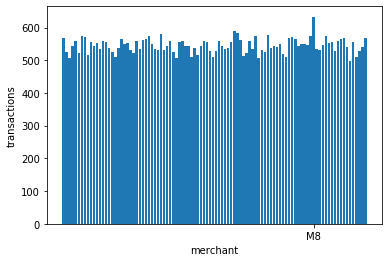

In [167]:
# Sanity-check with bar chart
keys = m_dict.keys()
values = m_dict.values()
plt.bar(keys, values)
plt.xlabel('merchant')
plt.ylabel('transactions')
plt.xticks([list(m_dict.keys()).index('M8')], ['M8']);
# Can clearly see a peak corresponding to merchant 'M8', i.e., an unusually high number of defrauded accounts 
# transacted with the same merchant (M8) some time before compromise of that merchant happened 

This suggests that the compromised merchant is M8. 

## Step 2: Finding harvest dates 

In [168]:
df3 = df2[df2.merchant == 'M8'] # DataFrame with transactions of compromised accounts with merchant M8 (no fraud)
df3

               date  fraud merchant
account                            
A665     30/01/2015  False       M8
A325     10/01/2015  False       M8
A743     09/01/2015  False       M8
A743     13/01/2015  False       M8
A743     15/01/2015  False       M8
...             ...    ...      ...
A917     30/01/2015  False       M8
A616     12/01/2015  False       M8
A331     17/01/2015  False       M8
A331     29/01/2015  False       M8
A331     30/01/2015  False       M8

[633 rows x 3 columns]

In [169]:
# dates on which transactions between compromised accounts and M8 were carried out
fraud_dates = sorted(list(df3.date))
fraud_dates[:5]

['01/01/2015', '01/01/2015', '01/01/2015', '01/01/2015', '01/01/2015']

In [170]:
# create dictionary of the form {date: number of transactions of compromised accounts with M8}
dict_dates = dict.fromkeys(fraud_dates, 0)
for date in fraud_dates:
    dict_dates[date] += 1
#dict_dates #uncomment to show

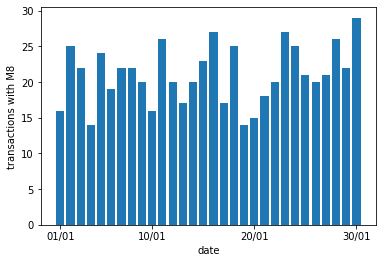

In [171]:
# check for any patterns using a bar chart 
keys = dict_dates.keys()
values = dict_dates.values()
plt.bar(keys, values)
plt.xlabel('date')
plt.ylabel('transactions with M8')
plt.xticks([0, 9, 19, 29], ['01/01', '10/01', '20/01', '30/01']);

Please see the Results section at the beginning of the Notebook for a comment on this. 

## Step 3: finding exploitation dates
### Step 3.1

In [172]:
lst_accounts = list(set(df3.index)) # list of compromised accounts that have made a transaction with M8
#lst_accounts[:5]

In [173]:
DF = df.loc[lst_accounts] # keep only compromised accounts that have made a transaction with M8
DF = DF[DF.fraud == True] # keep only frauded transactions 
DF

               date  fraud merchant
account                            
A665     22/01/2015   True      M82
A665     22/01/2015   True      M81
A665     22/01/2015   True      M44
A665     23/01/2015   True      M85
A665     23/01/2015   True      M55
...             ...    ...      ...
A903     15/01/2015   True      M27
A976     27/01/2015   True      M52
A917     30/01/2015   True      M57
A616     10/01/2015   True      M98
A331     26/01/2015   True      M61

[849 rows x 3 columns]

### Step 3.2 

In [174]:
exploit_dates = sorted(list(DF.date))
exploit_dates[:5]

['01/01/2015', '01/01/2015', '01/01/2015', '01/01/2015', '01/01/2015']

In [175]:
all_dates = sorted(list(set(df.date)))

In [176]:
dict_exploit = dict.fromkeys(all_dates, 0)
for date in exploit_dates:
    dict_exploit[date] += 1
    
dict_exploit

{'01/01/2015': 18,
 '02/01/2015': 18,
 '03/01/2015': 18,
 '04/01/2015': 9,
 '05/01/2015': 17,
 '06/01/2015': 29,
 '07/01/2015': 28,
 '08/01/2015': 17,
 '09/01/2015': 11,
 '10/01/2015': 22,
 '11/01/2015': 28,
 '12/01/2015': 18,
 '13/01/2015': 15,
 '14/01/2015': 14,
 '15/01/2015': 21,
 '16/01/2015': 15,
 '17/01/2015': 21,
 '18/01/2015': 18,
 '19/01/2015': 26,
 '20/01/2015': 16,
 '21/01/2015': 110,
 '22/01/2015': 119,
 '23/01/2015': 115,
 '24/01/2015': 10,
 '25/01/2015': 13,
 '26/01/2015': 19,
 '27/01/2015': 12,
 '28/01/2015': 24,
 '29/01/2015': 26,
 '30/01/2015': 22}

### Step 3.3 

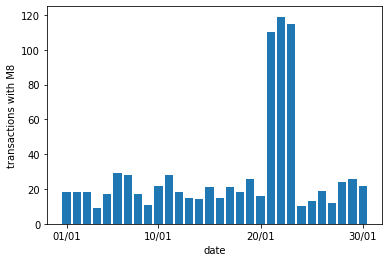

In [177]:
keys = dict_exploit.keys()
values = dict_exploit.values()
plt.bar(keys, values)
plt.xlabel('date')
plt.ylabel('transactions with M8')
plt.xticks([0, 9, 19, 29], ['01/01', '10/01', '20/01', '30/01']);

Thus it appears the data was exploited on the days
21/01/2015, 22/01/2015, 23/01/2015